In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import numpy as np
import geopandas as gpd
from glob import glob
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import FormatStrFormatter
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [3]:
sys.path.insert(1,'../analysis/')

In [4]:
from results_plotting import *

# Directory Pointers

In [5]:
results_paths = '../../results/plant_optimization/final_results'

## Europe grid shapefile

In [6]:
europe_grid, europe_borders = load_base_maps()
europe_grid = europe_grid[['lat','lon','country','sea_node','geometry']]
merge_cols = list(europe_grid.columns)
merge_cols.remove('geometry')

# Maps

## 2020

### On & Offshore

In [67]:
data_2020.loc[(data_2020.country==country)&(data_2020.shore_designation=='offshore')]

,lat,lon,shore_designation,wind_capacity_MW,wind_turbines,rated_turbine_power,rotor_diameter,turbine_type,wind_class,PV_capacity_MW,...,pt_in_sea,coast_pt,cent_lat,cent_lon,merra_lat,merra_lon,shore_dist,pv_lat,pv_lon,geometry


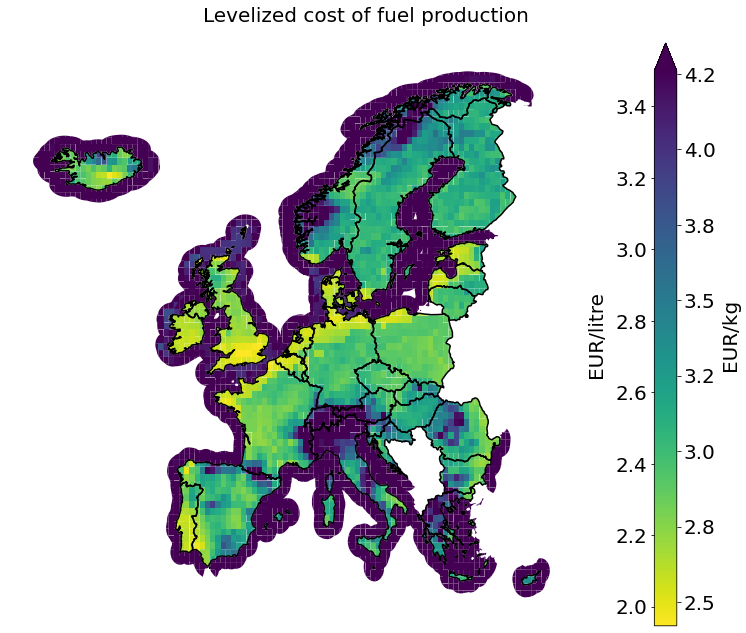

In [62]:
year = '2020'
data_2020 = pd.read_csv(os.path.join(results_paths,f'{year}.csv'))
data_2020_geo = gpd.GeoDataFrame(data_2020.drop(columns=['geometry'])).merge(europe_grid,on=merge_cols,how='left')

kerosene_density = 0.804 # [kg/L]
vmin,vmax = data_2020_geo.LCOF_liter.min(),3.5

countries = data_2020.country.unique()
figheight = 12
figsize=(figheight,figheight*1.2)
fig = plt.figure(figsize=figsize)#constrained_layout=True,
nrows = 8
ncols = 30
gs = fig.add_gridspec(nrows, ncols+3, wspace=-0.1)
axes = []
axes.append(fig.add_subplot(gs[0:nrows, 0:ncols-2]))
axes.append(fig.add_subplot(gs[1:nrows-1,ncols+2]))
    
fontsize = 20

df = data_2020_geo.loc[data_2020_geo.country.isin(countries)].copy()

europe_grid, europe_borders = load_base_maps()

borders = europe_borders.loc[europe_borders.country.isin(countries)].copy()
cmap = 'viridis_r'

l_kwds = legend_kwds={'extend':'max','orientation':'vertical'}
l_kwds.pop('bbox_to_anchor',None)
l_kwds.pop('fontsize',None)

df.plot(column='LCOF_liter',legend=True,cmap=cmap,vmin=vmin,vmax=vmax,missing_kwds=None,legend_kwds=l_kwds,cax=axes[-1],ax=axes[0])

borders.boundary.plot(color='k',ax=axes[0])
axes[0].axis('off')
# axes[0].text(.4,.9,'2020',fontsize=fontsize,horizontalalignment='center',transform=axes[0].transAxes)
# axes[0].set_title('Levelized cost of fuel production',fontsize=fontsize)
fig.suptitle('Levelized cost of fuel production',y=.8,x=.54,verticalalignment='bottom',fontsize=fontsize)

cb_ax = axes[-1]
cb_ax.tick_params(labelsize=fontsize)

cb_ax.set_ylabel('EUR/litre',labelpad=-90,fontsize=fontsize)
cb_ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
pos = cb_ax.get_position()
cb_ax_2 = cb_ax.twinx()
cb_ax_2.set_ylabel('EUR/kg',fontsize=fontsize,labelpad=5)
cb_ax_2.set_ylim((vmin/kerosene_density,vmax/kerosene_density))
cb_ax_2.tick_params(labelsize=fontsize)
cb_ax_2.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
for spine in cb_ax_2.spines.values():
    spine.set_visible(False)
    
# plt.savefig('../../gfx/2020_LCOF_map.png',bbox_inches='tight',dpi=400)

In [9]:
print(f'Minimum LCOF: {data_2020_geo.LCOF_liter.min():.3f} EUR/l ({data_2020_geo.LCOF_liter.min()/0.8*1e3:,.3f} EUR/tonne).')
print(f'Maximum LCOF: {data_2020_geo.LCOF_liter.max():.3f} EUR/l ({data_2020_geo.LCOF_liter.max()/0.8*1e3:,.3f} EUR/tonne).')

Minimum LCOF: 1.946 EUR/l (2,432.961 EUR/tonne).
Maximum LCOF: 16.950 EUR/l (21,187.655 EUR/tonne).


## 2030

### On & Offshore

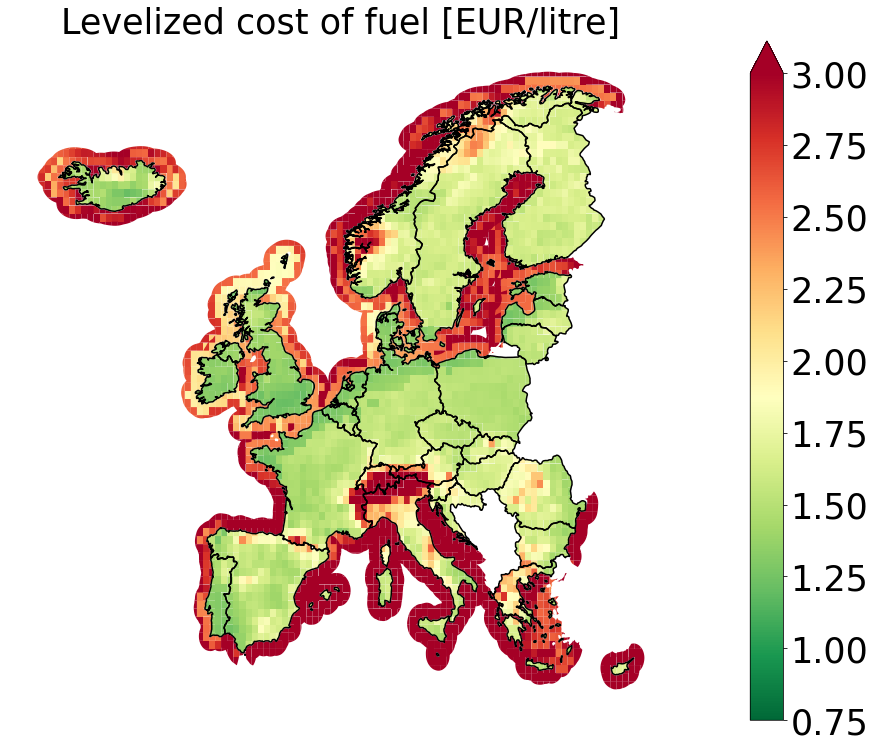

In [10]:
year = '2030'
data_2030 = pd.read_csv(os.path.join(results_paths,f'{year}.csv'))
data_2030_geo = gpd.GeoDataFrame(data_2030.drop(columns=['geometry'])).merge(europe_grid,on=merge_cols,how='left')
lcof_map(data_2030_geo,figsize=(15,15),min_lcof=0.75, max_lcof=3)

In [11]:
print(f'Minimum LCOF: {data_2030_geo.LCOF_liter.min():.3f} EUR/l ({data_2030_geo.LCOF_liter.min()/0.8*1e3:,.3f} EUR/tonne).')
print(f'Maximum LCOF: {data_2030_geo.LCOF_liter.max():.3f} EUR/l ({data_2030_geo.LCOF_liter.max()/0.8*1e3:,.3f} EUR/tonne).')

Minimum LCOF: 1.209 EUR/l (1,511.103 EUR/tonne).
Maximum LCOF: 64.541 EUR/l (80,676.762 EUR/tonne).


## 2040

### On & Offshore

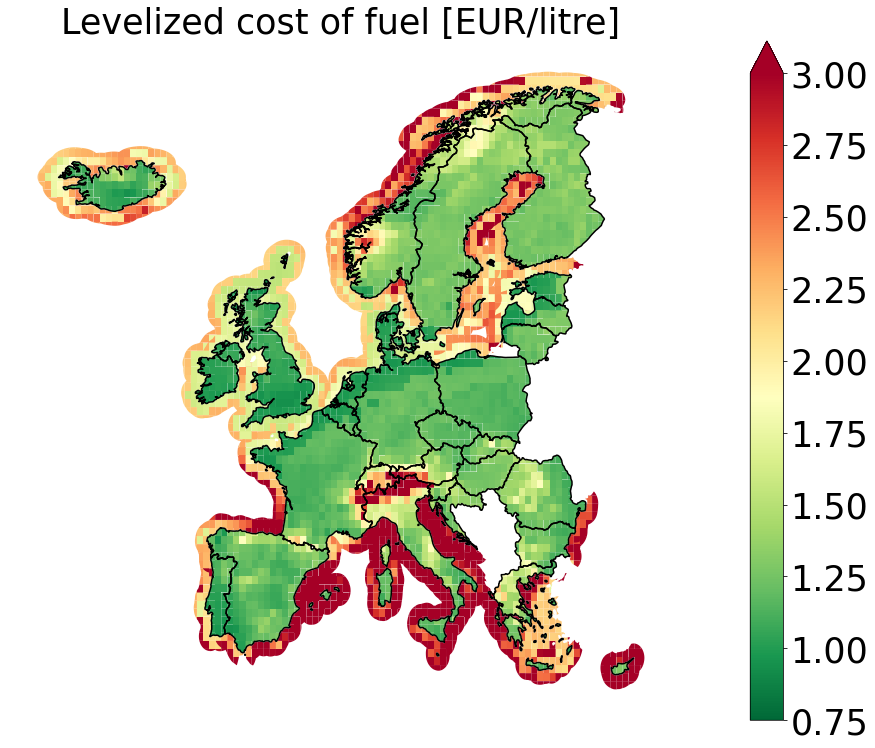

In [12]:
year = '2040'
data_2040 = pd.read_csv(os.path.join(results_paths,f'{year}.csv'))
data_2040_geo = gpd.GeoDataFrame(data_2040.drop(columns=['geometry'])).merge(europe_grid,on=merge_cols,how='left')
lcof_map(data_2040_geo,figsize=(15,15),min_lcof=0.75, max_lcof=3)

In [13]:
print(f'Minimum LCOF: {data_2040_geo.LCOF_liter.min():.3f} EUR/l ({data_2040_geo.LCOF_liter.min()/0.8*1e3:,.3f} EUR/tonne).')
print(f'Maximum LCOF: {data_2040_geo.LCOF_liter.max():.3f} EUR/l ({data_2040_geo.LCOF_liter.max()/0.8*1e3:,.3f} EUR/tonne).')

Minimum LCOF: 0.926 EUR/l (1,156.925 EUR/tonne).
Maximum LCOF: 9.196 EUR/l (11,494.715 EUR/tonne).


## 2050

### On & Offshore

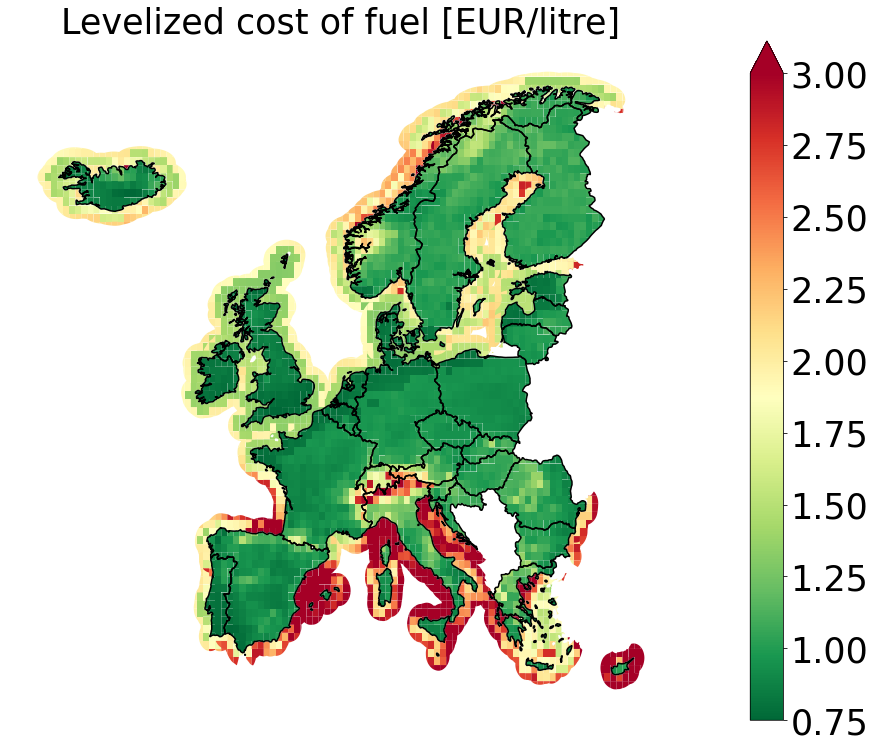

In [14]:
year = '2050'
data_2050 = pd.read_csv(os.path.join(results_paths,f'{year}.csv'))
data_2050_geo = gpd.GeoDataFrame(data_2050.drop(columns=['geometry'])).merge(europe_grid,on=merge_cols,how='left')
lcof_map(data_2050_geo,figsize=(15,15),min_lcof=0.75, max_lcof=3)

In [15]:
print(f'Minimum LCOF: {data_2050_geo.LCOF_liter.min():.3f} EUR/l ({data_2050_geo.LCOF_liter.min()/0.8*1e3:,.3f} EUR/tonne).')
print(f'Maximum LCOF: {data_2050_geo.LCOF_liter.max():.3f} EUR/l ({data_2050_geo.LCOF_liter.max()/0.8*1e3:,.3f} EUR/tonne).')

Minimum LCOF: 0.705 EUR/l (881.317 EUR/tonne).
Maximum LCOF: 7.478 EUR/l (9,348.052 EUR/tonne).


## All years

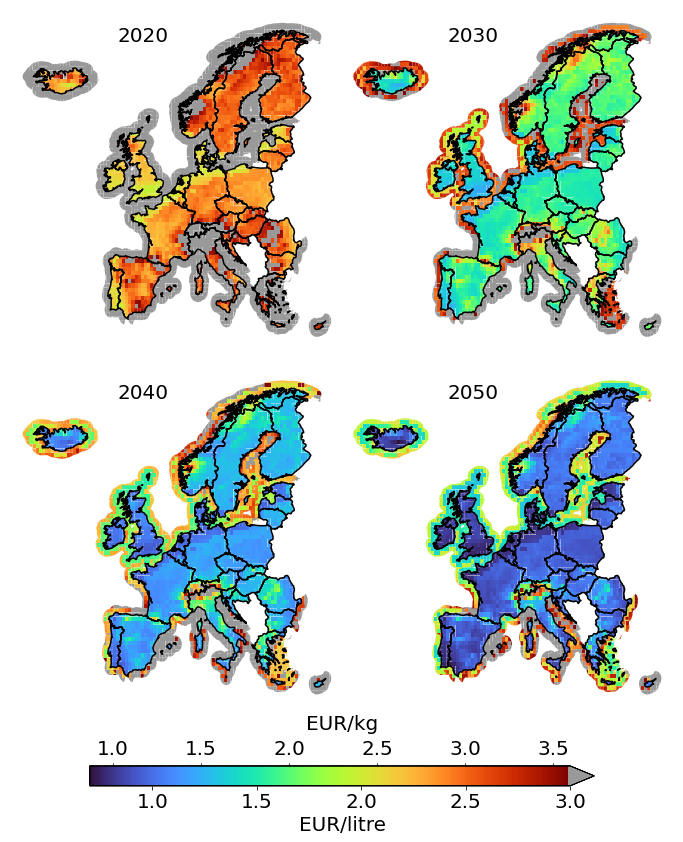

In [15]:
kerosene_density = 0.804 # [kg/L]
vmin,vmax = 0.7,3

countries = data_2020.country.unique()
figheight = 12
figsize=(figheight,figheight*1.2)
fig = plt.figure(figsize=figsize)#constrained_layout=True,
nrows = 30
ncols = 8
gs = fig.add_gridspec(nrows+3, ncols, wspace=-0.1)
axes = []
axes.append(fig.add_subplot(gs[0:int(nrows/2), 0:int(ncols/2)]))
axes.append(fig.add_subplot(gs[0:int(nrows/2), int(ncols/2):ncols]))
axes.append(fig.add_subplot(gs[int(nrows/2):nrows, 0:int(ncols/2)]))
axes.append(fig.add_subplot(gs[int(nrows/2):nrows, int(ncols/2):ncols]))
axes.append(fig.add_subplot(gs[nrows+2,1:ncols-1]))
    
fontsize = 20

for i,(data,title_year) in enumerate(zip([data_2020_geo, data_2030_geo, data_2040_geo, data_2050_geo],['2020','2030','2040','2050'])):

    df = data.loc[data.country.isin(countries)].copy()

    europe_grid, europe_borders = load_base_maps()

    borders = europe_borders.loc[europe_borders.country.isin(countries)].copy()
    cmap = 'RdYlGn_r'
    turbo_colors = cm.get_cmap('turbo',256).colors
    turbo_colors[-1,:-1] = 0.6
    turbo_colors[-1,-1] = 1
    cmap = ListedColormap(turbo_colors)

    l_kwds = legend_kwds={'extend':'max','orientation':'horizontal'}
    l_kwds.pop('bbox_to_anchor',None)
    l_kwds.pop('fontsize',None)

    df.plot(column='LCOF_liter',legend=True,cmap=cmap,vmin=vmin,vmax=vmax,missing_kwds=None,legend_kwds=l_kwds,cax=axes[-1],ax=axes[i])

    borders.boundary.plot(color='k',ax=axes[i])
    axes[i].axis('off')
    axes[i].text(.4,.9,title_year,fontsize=fontsize,horizontalalignment='center',transform=axes[i].transAxes)
    
cb_ax = axes[-1]
cb_ax.tick_params(labelsize=fontsize)

cb_ax.set_xlabel('EUR/litre',fontsize=fontsize)
cb_ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
pos = cb_ax.get_position()
cb_ax_2 = cb_ax.twiny()
cb_ax_2.set_xlabel('EUR/kg',fontsize=fontsize,labelpad=10)
cb_ax_2.set_xlim((vmin/kerosene_density,vmax/kerosene_density))
cb_ax_2.tick_params(labelsize=fontsize)
cb_ax_2.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
for spine in cb_ax_2.spines.values():
    spine.set_visible(False)
    
plt.savefig('../../gfx/LCOF_map_all_years.png',bbox_inches='tight',dpi=400)

# Country-level plots

In [120]:
%%time
kerosene_density = 0.804 # [kg/L]

countries = data_2020.country.unique()
figheight = 10
figsize=(figheight*2.4,figheight)
    
fontsize = 20

for country in countries:
    fig, axes = plt.subplots(nrows=2, ncols=4, figsize=figsize, gridspec_kw={'height_ratios':[20,1]})#constrained_layout=True,
    plot_axes = axes[0,:].flatten()
    cb_axes = axes[1,:].flatten()
    
    for i,(data,title_year) in enumerate(zip([data_2020_geo, data_2030_geo, data_2040_geo, data_2050_geo],['2020','2030','2040','2050'])):

        df = data.loc[(data.country==country)&(data.shore_designation=='onshore')].copy()

        europe_grid, europe_borders = load_base_maps()

        cmap = 'RdYlGn_r'
        turbo_colors = cm.get_cmap('turbo',256).colors
        cmap = ListedColormap(turbo_colors)

        l_kwds = {'extend':'max','orientation':'horizontal'}
        l_kwds.pop('bbox_to_anchor',None)
        l_kwds.pop('fontsize',None)

        vmin = df.LCOF_liter.min()
        vmax = min(df.LCOF_liter.max(),10)
        df.plot(column='LCOF_liter',legend=True, vmin=vmin, vmax=vmax, cmap=cmap,missing_kwds=None,legend_kwds=l_kwds,cax=cb_axes[i],ax=plot_axes[i])

        plot_axes[i].axis('off')
        plot_axes[i].text(.4,1,title_year,fontsize=fontsize,horizontalalignment='center',transform=plot_axes[i].transAxes)

        cb_ax = cb_axes[i]
        cb_ax.tick_params(labelsize=fontsize)

        cb_ax.set_xlabel('EUR/litre',fontsize=fontsize)
        cb_ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        pos = cb_ax.get_position()
        cb_ax_2 = cb_ax.twiny()
        cb_ax_2.set_xlabel('EUR/kg',fontsize=fontsize,labelpad=10)
        cb_ax_2.set_xlim((vmin/kerosene_density,vmax/kerosene_density))
        cb_ax_2.tick_params(labelsize=fontsize)
        cb_ax_2.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
        for spine in cb_ax_2.spines.values():
            spine.set_visible(False)

    plt.tight_layout()
    plt.savefig(f'../../gfx/LCOF_maps/{country}_LCOF_map.png',bbox_inches='tight',dpi=400)
    plt.close()
#     if country=='Croatia':
#         break
    

/opt/anaconda3/envs/EuroSAFs/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Attempting to set identical left == right == 2.906831693122504 results in singular transformations; automatically expanding.
/opt/anaconda3/envs/EuroSAFs/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Attempting to set identical left == right == 1.7764345427850405 results in singular transformations; automatically expanding.
/opt/anaconda3/envs/EuroSAFs/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Attempting to set identical left == right == 1.3304741794692374 results in singular transformations; automatically expanding.
/opt/anaconda3/envs/EuroSAFs/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: Attempting to set identical left == right == 1.028231193379453 results in singular transformations; automatically expanding.


CPU times: user 5min 7s, sys: 14.5 s, total: 5min 22s
Wall time: 2min 58s


In [118]:
ob = '{'
cb='}'

text = ''
for country in countries:
    text = text+f'''
    \\begin{ob}figure{cb}[h]
    \centering
      \includegraphics[width=0.99\\textwidth]{ob}{country}_LCOF_map{cb}
      \caption{ob}\\textbf{ob}PtL production costs in {country.replace('_',' ')} for 2020, 2030, 2040, and 2050.{cb}{cb}
      \label{ob}fig:{country}_LCOF_map{cb}
    \end{ob}figure{cb}
    '''
with open(f'../../gfx/LCOF_maps/latex_text.txt','w') as f:
    f.write(text)

# 2030 for graphical abstract

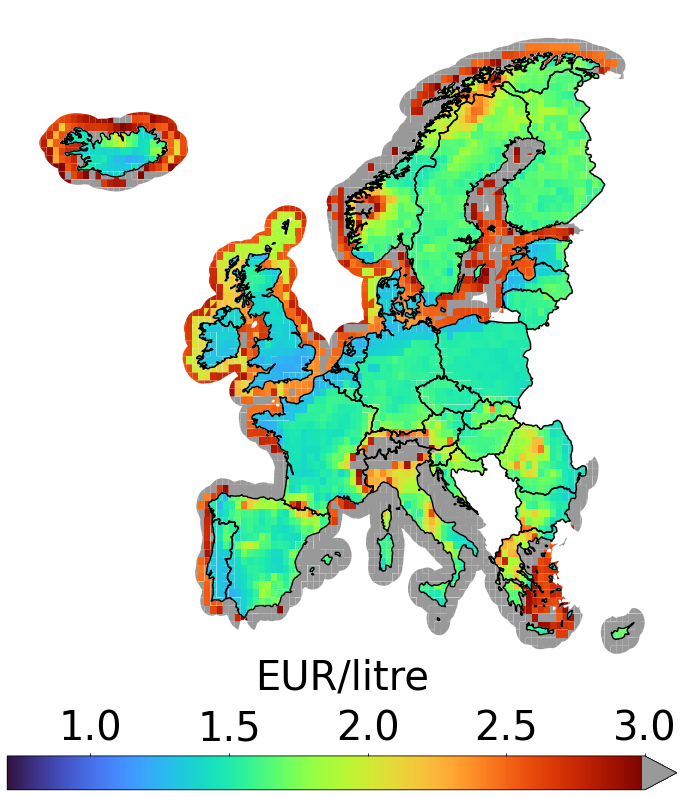

In [16]:
kerosene_density = 0.804 # [kg/L]
vmin,vmax = 0.7,3

countries = data_2020.country.unique()
figheight = 12
figsize=(figheight,figheight*1.2)
fig,axes = plt.subplots(nrows=2, figsize=figsize, gridspec_kw={'height_ratios':[20,1]})
    
fontsize = 40

# for i,(data,title_year) in enumerate(zip([data_2020_geo, data_2030_geo, data_2040_geo, data_2050_geo],['2020','2030','2040','2050'])):

df = data_2030_geo.loc[data_2030_geo.country.isin(countries)].copy()

europe_grid, europe_borders = load_base_maps()

borders = europe_borders.loc[europe_borders.country.isin(countries)].copy()
cmap = 'RdYlGn_r'
turbo_colors = cm.get_cmap('turbo',256).colors
turbo_colors[-1,:-1] = 0.6
turbo_colors[-1,-1] = 1
cmap = ListedColormap(turbo_colors)

l_kwds = legend_kwds={'extend':'max','orientation':'horizontal'}
l_kwds.pop('bbox_to_anchor',None)
l_kwds.pop('fontsize',None)

df.plot(column='LCOF_liter',legend=True,cmap=cmap,vmin=vmin,vmax=vmax,missing_kwds=None,legend_kwds=l_kwds,cax=axes[-1],ax=axes[0])

borders.boundary.plot(color='k',ax=axes[0])
axes[0].axis('off')

cb_ax = axes[-1]
cb_ax.tick_params(labelsize=fontsize)

cb_ax.set_xlabel('EUR/litre', labelpad=20, fontsize=fontsize)
cb_ax.xaxis.set_major_formatter(FormatStrFormatter('%.1f'))
cb_ax.xaxis.set_ticks_position('top')
cb_ax.xaxis.set_label_position('top')
    
# plt.savefig('../../gfx/2030_LCOF_map.png',bbox_inches='tight',dpi=400)